# MODEL BUILDING

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import warnings

%matplotlib inline 
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)

sns.set_style('darkgrid')

plt.rcParams["figure.figsize"] = (10, 6)


### Load the data

In [2]:
matches = pd.read_csv('matches.csv',header=0,index_col=0)
matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2022-08-07,16:30,Premier League,Matchweek 1,Sun,Away,W,2.0,0.0,West Ham,2.2,0.5,75.0,62443.0,İlkay Gündoğan,4-3-3,Michael Oliver,Match Report,NaN,13.0,1.0,18.7,1.0,1.0,1.0,2023,Manchester City
2,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,0.0,Bournemouth,1.7,0.1,67.0,53453.0,İlkay Gündoğan,4-2-3-1,David Coote,Match Report,NaN,19.0,7.0,17.5,0.0,0.0,0.0,2023,Manchester City
3,2022-08-21,16:30,Premier League,Matchweek 3,Sun,Away,D,3.0,3.0,Newcastle Utd,2.1,1.8,69.0,52258.0,İlkay Gündoğan,4-3-3,Jarred Gillett,Match Report,NaN,21.0,10.0,16.2,1.0,0.0,0.0,2023,Manchester City
4,2022-08-27,15:00,Premier League,Matchweek 4,Sat,Home,W,4.0,2.0,Crystal Palace,2.2,0.1,74.0,53112.0,Kevin De Bruyne,4-2-3-1,Darren England,Match Report,NaN,18.0,5.0,14.1,0.0,0.0,0.0,2023,Manchester City
5,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,6.0,0.0,Nott'ham Forest,3.3,0.7,74.0,53409.0,İlkay Gündoğan,4-2-3-1,Paul Tierney,Match Report,NaN,17.0,9.0,14.8,0.0,0.0,0.0,2023,Manchester City


### Data cleaning/preparing for machine learning model

1. make a copy of the data

In [3]:
df = matches.copy(deep=True)
df.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2022-08-07,16:30,Premier League,Matchweek 1,Sun,Away,W,2.0,0.0,West Ham,2.2,0.5,75.0,62443.0,İlkay Gündoğan,4-3-3,Michael Oliver,Match Report,NaN,13.0,1.0,18.7,1.0,1.0,1.0,2023,Manchester City
2,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,0.0,Bournemouth,1.7,0.1,67.0,53453.0,İlkay Gündoğan,4-2-3-1,David Coote,Match Report,NaN,19.0,7.0,17.5,0.0,0.0,0.0,2023,Manchester City
3,2022-08-21,16:30,Premier League,Matchweek 3,Sun,Away,D,3.0,3.0,Newcastle Utd,2.1,1.8,69.0,52258.0,İlkay Gündoğan,4-3-3,Jarred Gillett,Match Report,NaN,21.0,10.0,16.2,1.0,0.0,0.0,2023,Manchester City
4,2022-08-27,15:00,Premier League,Matchweek 4,Sat,Home,W,4.0,2.0,Crystal Palace,2.2,0.1,74.0,53112.0,Kevin De Bruyne,4-2-3-1,Darren England,Match Report,NaN,18.0,5.0,14.1,0.0,0.0,0.0,2023,Manchester City
5,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,6.0,0.0,Nott'ham Forest,3.3,0.7,74.0,53409.0,İlkay Gündoğan,4-2-3-1,Paul Tierney,Match Report,NaN,17.0,9.0,14.8,0.0,0.0,0.0,2023,Manchester City


2. check shape and columns of the data

In [4]:
df.shape

(3800, 27)

In [5]:
df.columns

Index(['date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'gf', 'ga',
       'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain', 'formation',
       'referee', 'match report', 'notes', 'sh', 'sot', 'dist', 'fk', 'pk',
       'pkatt', 'season', 'team'],
      dtype='object')

3. convert date and time columns into the datetime datatype respectively.

In [6]:
df['date'] =pd.to_datetime(df['date'])
df['time'] = pd.to_datetime(df['time'])
print(df['date'].dtype)
print(df['time'].dtype)

datetime64[ns]
datetime64[ns]


In [7]:
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day_of_week
df['hr'] = df['time'].dt.hour

df.drop(columns = ['date','time'], inplace = True)

df.head()

,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team,month,hr
1,Premier League,Matchweek 1,6,Away,W,2.0,0.0,West Ham,2.2,0.5,75.0,62443.0,İlkay Gündoğan,4-3-3,Michael Oliver,Match Report,NaN,13.0,1.0,18.7,1.0,1.0,1.0,2023,Manchester City,8,16
2,Premier League,Matchweek 2,5,Home,W,4.0,0.0,Bournemouth,1.7,0.1,67.0,53453.0,İlkay Gündoğan,4-2-3-1,David Coote,Match Report,NaN,19.0,7.0,17.5,0.0,0.0,0.0,2023,Manchester City,8,15
3,Premier League,Matchweek 3,6,Away,D,3.0,3.0,Newcastle Utd,2.1,1.8,69.0,52258.0,İlkay Gündoğan,4-3-3,Jarred Gillett,Match Report,NaN,21.0,10.0,16.2,1.0,0.0,0.0,2023,Manchester City,8,16
4,Premier League,Matchweek 4,5,Home,W,4.0,2.0,Crystal Palace,2.2,0.1,74.0,53112.0,Kevin De Bruyne,4-2-3-1,Darren England,Match Report,NaN,18.0,5.0,14.1,0.0,0.0,0.0,2023,Manchester City,8,15
5,Premier League,Matchweek 5,2,Home,W,6.0,0.0,Nott'ham Forest,3.3,0.7,74.0,53409.0,İlkay Gündoğan,4-2-3-1,Paul Tierney,Match Report,NaN,17.0,9.0,14.8,0.0,0.0,0.0,2023,Manchester City,8,19


In [8]:
print(f"month : {df['month'].unique()}")
print(f"day : {df['day'].unique()}")
print(f"hour : {df['hr'].unique()}")

month : [ 8  9 10 11 12  1  2  3  4  5  6  7]
day : [6 5 2 3 4 0 1]
hour : [16 15 19 17 12 14 20 13 18]


4. drop the insignificunt columns

In [9]:
df.drop(columns = ['comp','match report','notes','captain','pk','pkatt'],inplace=True)
df.shape

(3800, 21)

In [10]:
df.columns

Index(['round', 'day', 'venue', 'result', 'gf', 'ga', 'opponent', 'xg', 'xga',
       'poss', 'attendance', 'formation', 'referee', 'sh', 'sot', 'dist', 'fk',
       'season', 'team', 'month', 'hr'],
      dtype='object')

5. modified the target column as per our neccessity

In [11]:
df.result.value_counts()

W    1479
L    1479
D     842
Name: result, dtype: int64

In [12]:
df['result'].replace({'D':'L'},inplace=True)
df.result.value_counts()

L    2321
W    1479
Name: result, dtype: int64

In [13]:
df['result'].replace({'W' : 1 , 'L': 0} , inplace =True)
df['result'].unique()

array([1, 0], dtype=int64)

6. make neccessary changes in columns from the information we got after EDA.m

In [14]:
# Define the replacement dictionary with reversed key-value pairs
replacement_dict = {
    'Brighton and Hove Albion': 'Brighton',
    'Huddersfield Town': 'Huddersfield',
    'Manchester United': 'Manchester Utd',
    'Newcastle United': 'Newcastle Utd',
    'Nottingham Forest': "Nott'ham Forest",
    'Sheffield United': 'Sheffield Utd',
    'Tottenham Hotspur': 'Tottenham',
    'West Bromwich Albion': 'West Brom',
    'West Ham United': 'West Ham',
    'Wolverhampton Wanderers': 'Wolves'
}

# Replace the values in the 'opponent' column
df['team'] = df['team'].replace(replacement_dict)


In [15]:
df['team'].unique()

array(['Manchester City', 'Arsenal', 'Manchester Utd', 'Newcastle Utd',
       'Liverpool', 'Brighton', 'Aston Villa', 'Tottenham', 'Brentford',
       'Fulham', 'Crystal Palace', 'Chelsea', 'Wolves', 'West Ham',
       'Bournemouth', "Nott'ham Forest", 'Everton', 'Leicester City',
       'Leeds United', 'Southampton', 'Burnley', 'Watford',
       'Norwich City', 'West Brom', 'Sheffield Utd', 'Cardiff City',
       'Huddersfield'], dtype=object)

In [16]:
df['team'].unique()

array(['Manchester City', 'Arsenal', 'Manchester Utd', 'Newcastle Utd',
       'Liverpool', 'Brighton', 'Aston Villa', 'Tottenham', 'Brentford',
       'Fulham', 'Crystal Palace', 'Chelsea', 'Wolves', 'West Ham',
       'Bournemouth', "Nott'ham Forest", 'Everton', 'Leicester City',
       'Leeds United', 'Southampton', 'Burnley', 'Watford',
       'Norwich City', 'West Brom', 'Sheffield Utd', 'Cardiff City',
       'Huddersfield'], dtype=object)

In [17]:
# Get unique categories from each column
unique_categories_column1 = df['team'].unique()
unique_categories_column2 = df['opponent'].unique()

# Find categories that are not the same in both columns
categories_not_in_column1 = sorted(set(unique_categories_column2) - set(unique_categories_column1))
categories_not_in_column2 = sorted(set(unique_categories_column1) - set(unique_categories_column2))

print(f"there are {len(categories_not_in_column1)} teams with shortened name in 'oppenent column\n")
print('oppenent : team\n')

# Print categories that are not the same in both columns
for i,j in zip(categories_not_in_column1,categories_not_in_column2):
    print(f"{i} : {j}")


there are 0 teams with shortened name in 'oppenent column

oppenent : team



In [18]:
# Calculate the value counts of teams
team_counts = df['team'].value_counts()

# Get the teams with a value count of 38
teams_to_drop = team_counts[team_counts == 38].index.tolist()

# Drop the rows based on the teams with value count 38
df = df[~df['team'].isin(teams_to_drop)]
df = df[~df['opponent'].isin(teams_to_drop)]

# Print the updated DataFrame
df.shape


(3500, 21)

In [19]:
teams_to_drop

["Nott'ham Forest", 'West Brom', 'Cardiff City', 'Huddersfield']

In [20]:
df.team.value_counts()

Manchester City    182
Crystal Palace     182
Southampton        182
Leicester City     182
Everton            182
West Ham           182
Wolves             182
Arsenal            182
Chelsea            182
Tottenham          182
Brighton           182
Liverpool          182
Newcastle Utd      182
Manchester Utd     182
Aston Villa        148
Burnley            146
Leeds United       110
Watford            110
Bournemouth        108
Fulham             106
Norwich City        76
Brentford           74
Sheffield Utd       74
Name: team, dtype: int64

In [21]:
df.opponent.value_counts()

West Ham           182
Liverpool          182
Arsenal            182
Tottenham          182
Chelsea            182
Everton            182
Leicester City     182
Brighton           182
Southampton        182
Manchester Utd     182
Wolves             182
Crystal Palace     182
Newcastle Utd      182
Manchester City    182
Aston Villa        148
Burnley            146
Watford            110
Leeds United       110
Bournemouth        108
Fulham             106
Norwich City        76
Brentford           74
Sheffield Utd       74
Name: opponent, dtype: int64

### train data and test data for machine learning model

1.train-test split

In [22]:
df['season'].unique()

array([2023, 2022, 2021, 2020, 2019], dtype=int64)

In [23]:
train = df[df['season'] != 2023]
test = df[df['season'] == 2023]

train.drop('season',axis = 1,inplace=True)
test.drop('season',axis = 1,inplace=True)

print(train.shape)
print(test.shape)

(2816, 20)
(684, 20)


In [24]:
train.head()

,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,formation,referee,sh,sot,dist,fk,team,month,hr
1,Matchweek 1,6,Away,0,0.0,1.0,Tottenham,1.8,1.0,65.0,58262.0,4-3-3,Anthony Taylor,18.0,4.0,17.3,1.0,Manchester City,8,16
2,Matchweek 2,5,Home,1,5.0,0.0,Norwich City,2.6,0.1,67.0,51437.0,4-3-3,Graham Scott,16.0,4.0,18.5,1.0,Manchester City,8,15
3,Matchweek 3,5,Home,1,5.0,0.0,Arsenal,4.4,0.2,80.0,52276.0,4-3-3,Martin Atkinson,25.0,10.0,14.8,0.0,Manchester City,8,12
4,Matchweek 4,5,Away,1,1.0,0.0,Leicester City,2.8,0.6,61.0,32087.0,4-3-3,Paul Tierney,25.0,8.0,14.3,0.0,Manchester City,9,15
6,Matchweek 5,5,Home,0,0.0,0.0,Southampton,1.0,0.4,64.0,52698.0,4-3-3,Jonathan Moss,16.0,1.0,16.4,1.0,Manchester City,9,15


In [25]:
X_train = train.drop('result',axis = 1)
y_train = train['result']

X_test = test.drop('result',axis = 1)
y_test = test['result']

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(2816, 19)
(2816,)
(684, 19)
(684,)


2. deal with missing values 

In [26]:
X_train.isnull().sum()

round           0
day             0
venue           0
gf              0
ga              0
opponent        0
xg              0
xga             0
poss            0
attendance    810
formation       0
referee         0
sh              0
sot             0
dist            2
fk              0
team            0
month           0
hr              0
dtype: int64

In [27]:
num_col = X_train.select_dtypes(exclude='object').columns
cat_col = X_train.select_dtypes(include ='object').columns

print(num_col)
print(cat_col)

Index(['day', 'gf', 'ga', 'xg', 'xga', 'poss', 'attendance', 'sh', 'sot',
       'dist', 'fk', 'month', 'hr'],
      dtype='object')
Index(['round', 'venue', 'opponent', 'formation', 'referee', 'team'], dtype='object')


In [28]:
for i in X_train.columns :
    if i in num_col:
        X_train[i].fillna(value = X_train[i].mean(), inplace = True)
    
    if i in cat_col :
        X_train[i].fillna(value = X_train[i].mode()[0] ,inplace = True)
        
X_train.isnull().sum()

round         0
day           0
venue         0
gf            0
ga            0
opponent      0
xg            0
xga           0
poss          0
attendance    0
formation     0
referee       0
sh            0
sot           0
dist          0
fk            0
team          0
month         0
hr            0
dtype: int64

3. handling outliers 

In [29]:
# Specify the columns that need outlier treatment
columns_to_treat = num_col

# Function to treat outliers using Tukey's method
def treat_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)

# Treat outliers for the specified columns
for column in columns_to_treat:
    treat_outliers(X_train, column)

# Check the updated DataFrame
X_train.head()


,round,day,venue,gf,ga,opponent,xg,xga,poss,attendance,formation,referee,sh,sot,dist,fk,team,month,hr
1,Matchweek 1,6.0,Away,0.0,1.0,Tottenham,1.80,1.0,65.0,58262.0,4-3-3,Anthony Taylor,18.0,4.0,17.3,1.0,Manchester City,8,16
2,Matchweek 2,5.0,Home,5.0,0.0,Norwich City,2.60,0.1,67.0,51437.0,4-3-3,Graham Scott,16.0,4.0,18.5,1.0,Manchester City,8,15
3,Matchweek 3,5.0,Home,5.0,0.0,Arsenal,3.45,0.2,80.0,52276.0,4-3-3,Martin Atkinson,25.0,10.0,14.8,0.0,Manchester City,8,12
4,Matchweek 4,5.0,Away,1.0,0.0,Leicester City,2.80,0.6,61.0,32087.0,4-3-3,Paul Tierney,25.0,8.0,14.3,0.0,Manchester City,9,15
6,Matchweek 5,5.0,Home,0.0,0.0,Southampton,1.00,0.4,64.0,52698.0,4-3-3,Jonathan Moss,16.0,1.0,16.4,1.0,Manchester City,9,15


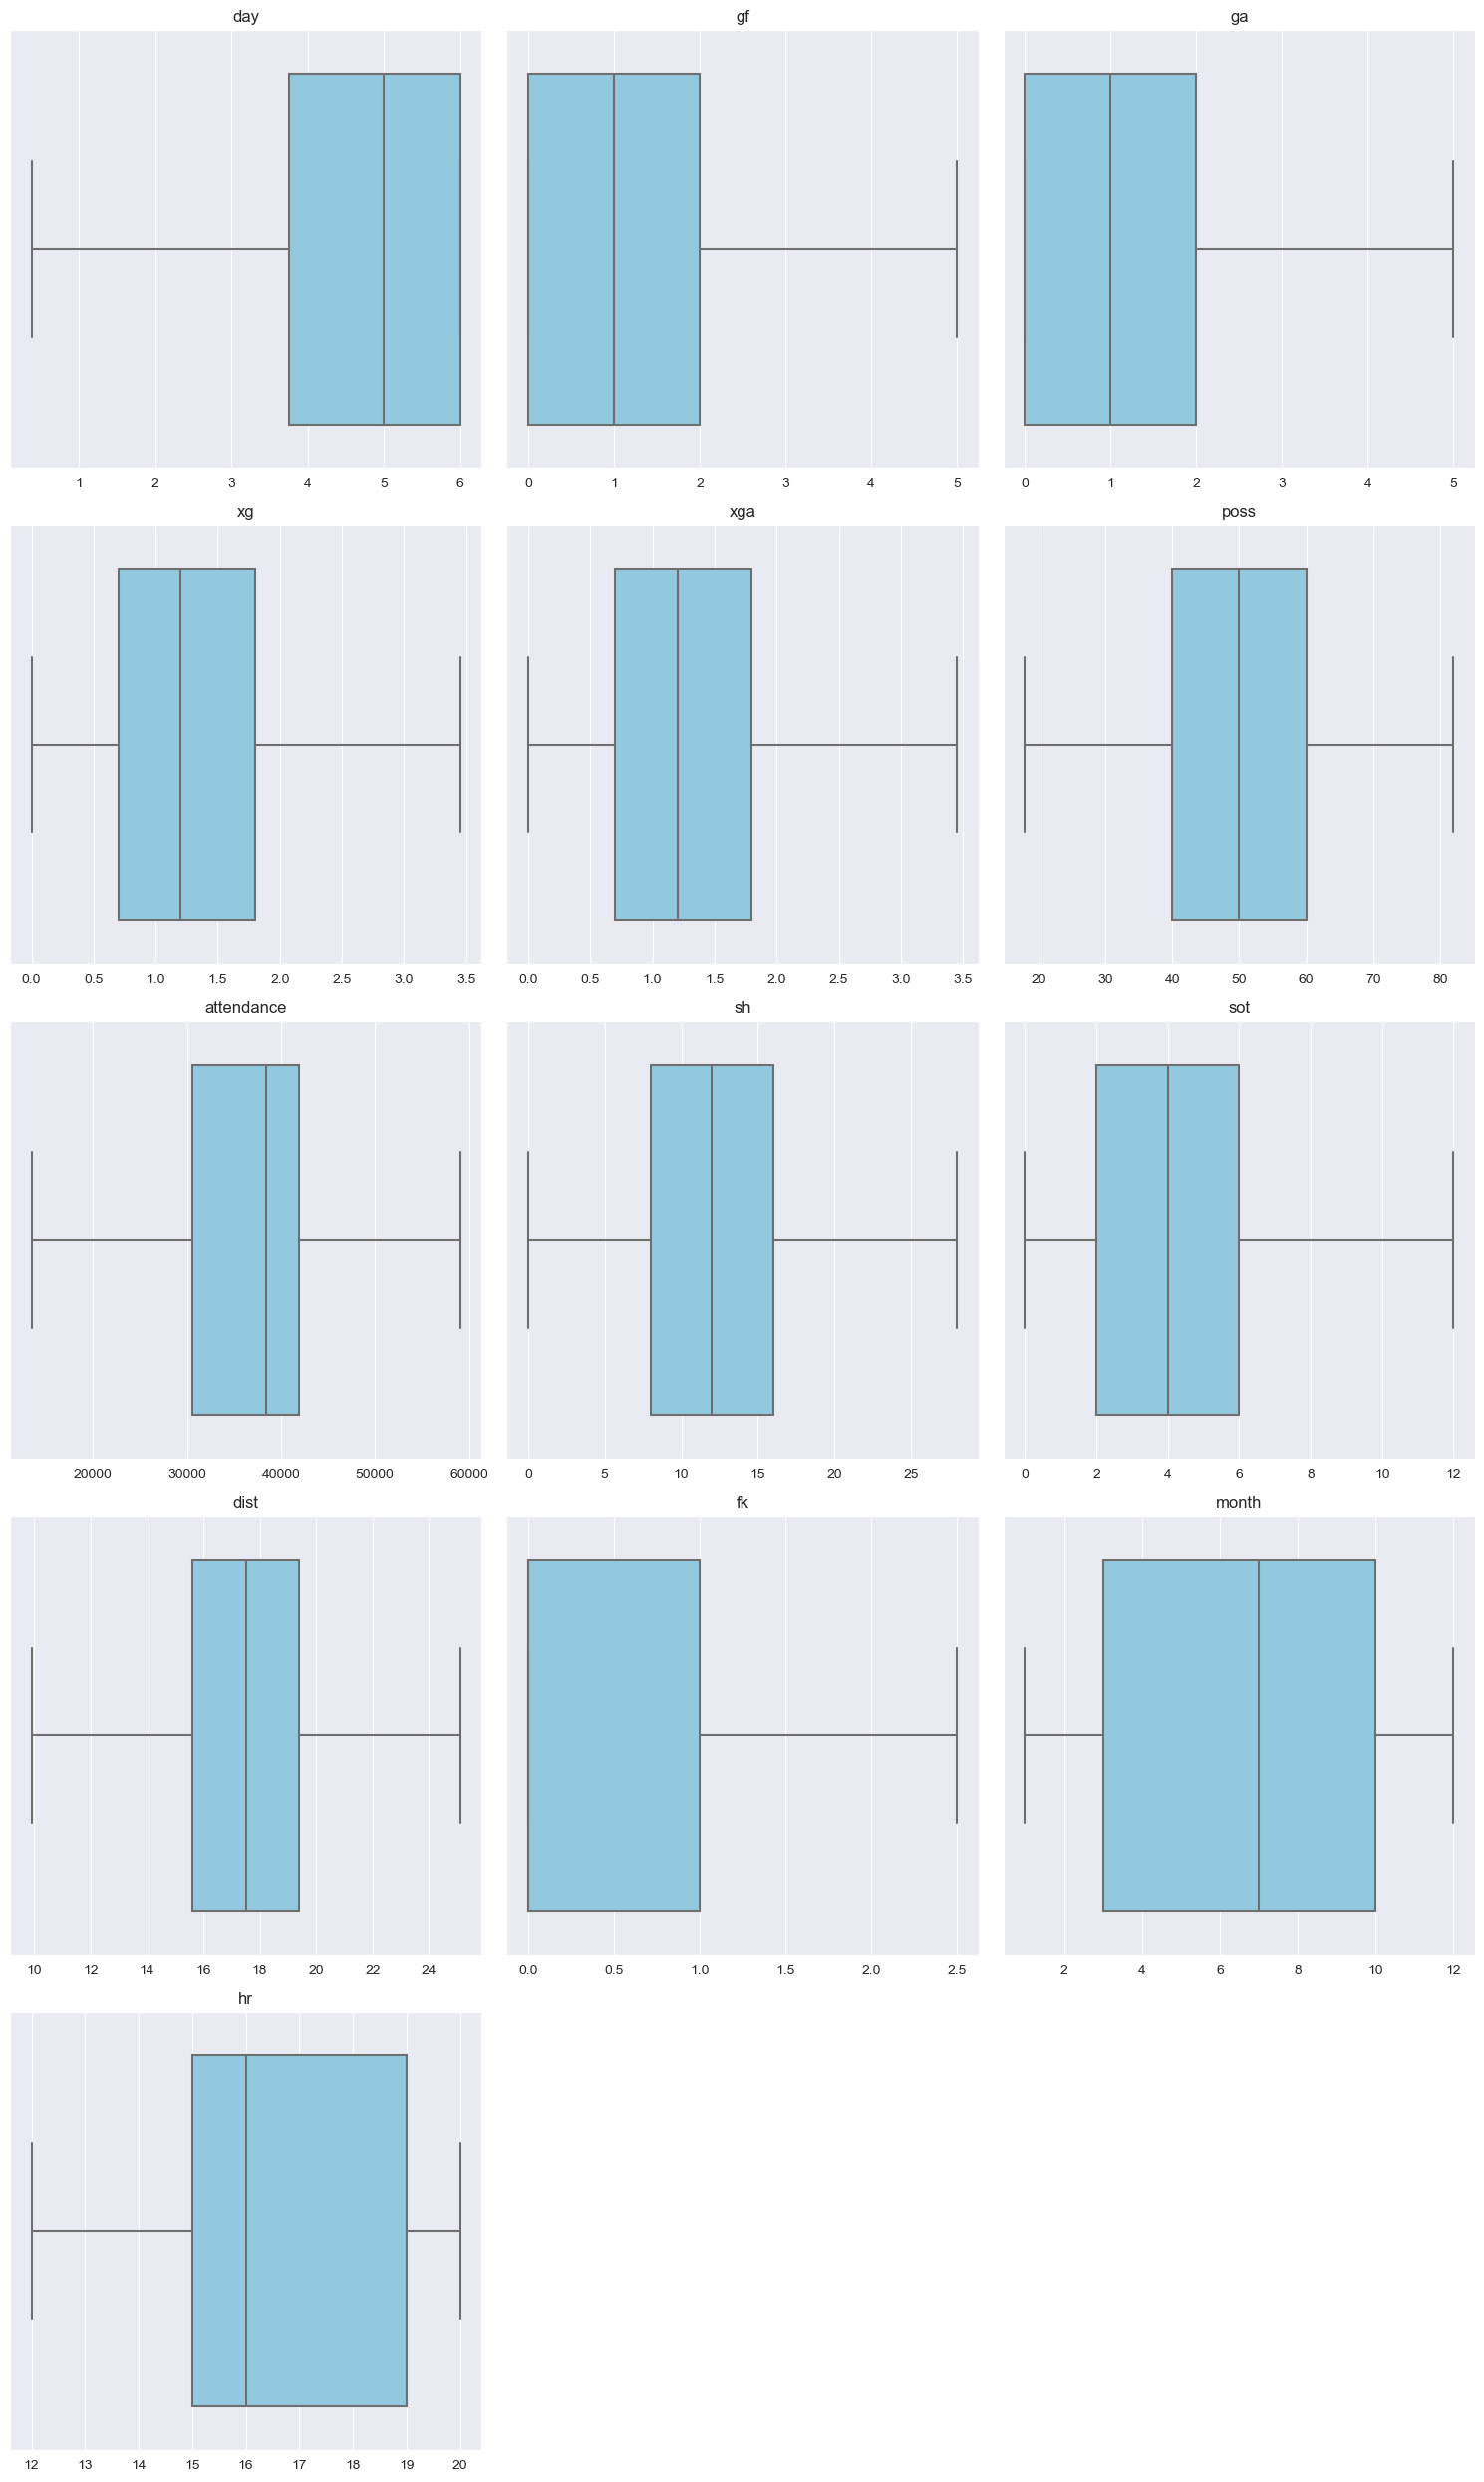

In [30]:
# Determine the number of columns in the DataFrame
num_columns = len(num_col)

# Calculate the number of rows required for subplots
num_rows = (num_columns + 2) // 3  # Add 2 to handle uneven number of columns

# Set up the subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))

# Flatten the axes array
axes = axes.flatten()

# Plot boxplots for each column
for i, column in enumerate(num_col):
    sns.boxplot(ax=axes[i], data=X_train, x = column, color='skyblue')
    axes[i].set_title(column)
    axes[i].set_xlabel('')

# Remove empty subplots if present
if num_columns < len(axes):
    for j in range(num_columns, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [31]:
X_train.head()

,round,day,venue,gf,ga,opponent,xg,xga,poss,attendance,formation,referee,sh,sot,dist,fk,team,month,hr
1,Matchweek 1,6.0,Away,0.0,1.0,Tottenham,1.80,1.0,65.0,58262.0,4-3-3,Anthony Taylor,18.0,4.0,17.3,1.0,Manchester City,8,16
2,Matchweek 2,5.0,Home,5.0,0.0,Norwich City,2.60,0.1,67.0,51437.0,4-3-3,Graham Scott,16.0,4.0,18.5,1.0,Manchester City,8,15
3,Matchweek 3,5.0,Home,5.0,0.0,Arsenal,3.45,0.2,80.0,52276.0,4-3-3,Martin Atkinson,25.0,10.0,14.8,0.0,Manchester City,8,12
4,Matchweek 4,5.0,Away,1.0,0.0,Leicester City,2.80,0.6,61.0,32087.0,4-3-3,Paul Tierney,25.0,8.0,14.3,0.0,Manchester City,9,15
6,Matchweek 5,5.0,Home,0.0,0.0,Southampton,1.00,0.4,64.0,52698.0,4-3-3,Jonathan Moss,16.0,1.0,16.4,1.0,Manchester City,9,15


4. prepare the test data

In [32]:
# Iterate through categorical columns of X_train
for column in cat_col:
    # Get unique values in X_train and X_test
    train_values = set(X_train[column].unique())
    test_values = set(X_test[column].unique())
    
    # Find values in X_test that are not present in X_train
    missing_values = test_values - train_values
    
    # Assign null values in X_test for missing values
    X_test.loc[X_test[column].isin(missing_values), column] = np.nan


we drop the data which is unfamiliar with the training data .. if some categories is not resent in the training data but in present in the test data ..we will conver that categories in np.NAN values and then fill the null value accordingly.

In [33]:
X_test.isnull().sum()

round          0
day            0
venue          0
gf             0
ga             0
opponent       0
xg             0
xga            0
poss           0
attendance     8
formation     11
referee       22
sh             0
sot            0
dist           0
fk             0
team           0
month          0
hr             0
dtype: int64

In [34]:
for i in X_test.columns :
    if i in num_col:
        X_test[i].fillna(value = X_train[i].mean(), inplace = True)
    
    if i in cat_col :
        X_test[i].fillna(value = X_train[i].mode()[0] ,inplace = True)
        
X_test.isnull().sum()

round         0
day           0
venue         0
gf            0
ga            0
opponent      0
xg            0
xga           0
poss          0
attendance    0
formation     0
referee       0
sh            0
sot           0
dist          0
fk            0
team          0
month         0
hr            0
dtype: int64

5.convert categorical variables to numerical variables.

In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in cat_col:
    le.fit(X_train[i])
    X_train[i] = le.transform(X_train[i])
    X_test[i] = le.transform(X_test[i])
    


In [36]:
X_train.head()

,round,day,venue,gf,ga,opponent,xg,xga,poss,attendance,formation,referee,sh,sot,dist,fk,team,month,hr
1,0,6.0,0,0.0,1.0,19,1.80,1.0,65.0,58262.0,14,2,18.0,4.0,17.3,1.0,13,8,16
2,11,5.0,1,5.0,0.0,16,2.60,0.1,67.0,51437.0,14,7,16.0,4.0,18.5,1.0,13,8,15
3,22,5.0,1,5.0,0.0,0,3.45,0.2,80.0,52276.0,14,14,25.0,10.0,14.8,0.0,13,8,12
4,32,5.0,0,1.0,0.0,11,2.80,0.6,61.0,32087.0,14,19,25.0,8.0,14.3,0.0,13,9,15
6,33,5.0,1,0.0,0.0,18,1.00,0.4,64.0,52698.0,14,10,16.0,1.0,16.4,1.0,13,9,15


In [37]:
X_test.head()

,round,day,venue,gf,ga,opponent,xg,xga,poss,attendance,formation,referee,sh,sot,dist,fk,team,month,hr
1,0,6,0,2.0,0.0,21,2.2,0.5,75.0,62443.0,14,15,13.0,1.0,18.7,1.0,13,8,16
2,11,5,1,4.0,0.0,2,1.7,0.1,67.0,53453.0,11,6,19.0,7.0,17.5,0.0,13,8,15
3,22,6,0,3.0,3.0,15,2.1,1.8,69.0,52258.0,14,8,21.0,10.0,16.2,1.0,13,8,16
4,32,5,1,4.0,2.0,7,2.2,0.1,74.0,53112.0,11,5,18.0,5.0,14.1,0.0,13,8,15
6,34,5,0,1.0,1.0,1,2.1,0.3,71.0,41830.0,14,23,13.0,4.0,16.8,1.0,13,9,17


6. standardizes the data

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [39]:
X_train_scaled

array([[-1.68802721,  0.92083764, -1.        , ...,  0.24905962,
         0.32376517, -0.07664765],
       [-0.68429682,  0.34998925,  1.        , ...,  0.24905962,
         0.32376517, -0.47933382],
       [ 0.31943357,  0.34998925,  1.        , ...,  0.24905962,
         0.32376517, -1.68739232],
       ...,
       [ 0.86692287,  0.34998925, -1.        , ..., -0.35503331,
        -0.69777289, -0.47933382],
       [ 1.0494193 ,  0.34998925, -1.        , ..., -0.35503331,
        -0.44238837, -0.47933382],
       [ 1.14066752,  0.92083764,  1.        , ..., -0.35503331,
        -0.44238837, -0.47933382]])

In [40]:
X_test_scaled

array([[-1.68802721,  0.92083764, -1.        , ...,  0.24905962,
         0.32376517, -0.07664765],
       [-0.68429682,  0.34998925,  1.        , ...,  0.24905962,
         0.32376517, -0.47933382],
       [ 0.31943357,  0.92083764, -1.        , ...,  0.24905962,
         0.32376517, -0.07664765],
       ...,
       [ 0.95817109,  0.34998925,  1.        , ...,  1.00417579,
        -0.44238837, -0.47933382],
       [ 1.0494193 ,  0.92083764, -1.        , ...,  1.00417579,
        -0.44238837, -0.88201999],
       [ 1.14066752,  0.92083764,  1.        , ...,  1.00417579,
        -0.44238837, -0.07664765]])

7. feature importance 

In [41]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train_scaled,y_train)

feature_importances = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

print(feature_importance_df.reset_index(drop=True))

       Feature  Importance
0           gf    0.393659
1           ga    0.270472
2           xg    0.062108
3          xga    0.056129
4          sot    0.050712
5         dist    0.020401
6           sh    0.017748
7         poss    0.017322
8   attendance    0.015045
9         team    0.014521
10    opponent    0.014263
11       round    0.013574
12     referee    0.012246
13   formation    0.011212
14       month    0.009534
15          hr    0.008076
16         day    0.005481
17          fk    0.004003
18       venue    0.003494


goals socred ('gf') and goals scored against ('ga') are the two features wiht very significance as compared to other features.. this target valiable is biased with the these two features .. therefore to get the unbiased model we will drop these two highly significant features.

In [42]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

y_pred = model.predict(X_test_scaled)

print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))
print()
print(accuracy_score(y_test,y_pred))

[[417   1]
 [  3 263]]

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       418
           1       1.00      0.99      0.99       266

    accuracy                           0.99       684
   macro avg       0.99      0.99      0.99       684
weighted avg       0.99      0.99      0.99       684


0.9941520467836257


Drop features 'gf' and 'ga'

In [43]:
X_train.drop(columns = ['gf','ga'] ,inplace=True)
X_test.drop(columns = ['gf','ga'] ,inplace=True)

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [45]:
X_train_scaled

array([[-1.68802721,  0.92083764, -1.        , ...,  0.24905962,
         0.32376517, -0.07664765],
       [-0.68429682,  0.34998925,  1.        , ...,  0.24905962,
         0.32376517, -0.47933382],
       [ 0.31943357,  0.34998925,  1.        , ...,  0.24905962,
         0.32376517, -1.68739232],
       ...,
       [ 0.86692287,  0.34998925, -1.        , ..., -0.35503331,
        -0.69777289, -0.47933382],
       [ 1.0494193 ,  0.34998925, -1.        , ..., -0.35503331,
        -0.44238837, -0.47933382],
       [ 1.14066752,  0.92083764,  1.        , ..., -0.35503331,
        -0.44238837, -0.47933382]])

In [46]:
X_test_scaled

array([[-1.68802721,  0.92083764, -1.        , ...,  0.24905962,
         0.32376517, -0.07664765],
       [-0.68429682,  0.34998925,  1.        , ...,  0.24905962,
         0.32376517, -0.47933382],
       [ 0.31943357,  0.92083764, -1.        , ...,  0.24905962,
         0.32376517, -0.07664765],
       ...,
       [ 0.95817109,  0.34998925,  1.        , ...,  1.00417579,
        -0.44238837, -0.47933382],
       [ 1.0494193 ,  0.92083764, -1.        , ...,  1.00417579,
        -0.44238837, -0.88201999],
       [ 1.14066752,  0.92083764,  1.        , ...,  1.00417579,
        -0.44238837, -0.07664765]])

In [47]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train_scaled,y_train)

feature_importances = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

print(feature_importance_df.reset_index(drop=True))

       Feature  Importance
0           xg    0.147258
1          xga    0.136258
2          sot    0.108564
3         dist    0.071598
4         poss    0.069174
5           sh    0.061684
6     opponent    0.054109
7         team    0.052393
8   attendance    0.051687
9        round    0.049780
10     referee    0.045157
11   formation    0.038660
12       month    0.033979
13          hr    0.030870
14         day    0.022660
15          fk    0.015630
16       venue    0.010538


### try and choose which base model works best

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


models = [
    ('Logistic Regression', LogisticRegression(penalty='l2')),
    ('Naïve Bayes', GaussianNB()),
    ('KNN', KNeighborsClassifier(n_neighbors=10)),
    ('Tree' ,DecisionTreeClassifier(random_state=452 , min_samples_split=10)),
    ('SVM', SVC(gamma=0.01 , C = 1 , kernel='rbf'))
]

for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    print(name)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print()


Logistic Regression
Confusion Matrix:
[[360  58]
 [104 162]]
Accuracy Score: 0.7631578947368421
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       418
           1       0.74      0.61      0.67       266

    accuracy                           0.76       684
   macro avg       0.76      0.74      0.74       684
weighted avg       0.76      0.76      0.76       684


Naïve Bayes
Confusion Matrix:
[[324  94]
 [104 162]]
Accuracy Score: 0.7105263157894737
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       418
           1       0.63      0.61      0.62       266

    accuracy                           0.71       684
   macro avg       0.69      0.69      0.69       684
weighted avg       0.71      0.71      0.71       684


KNN
Confusion Matrix:
[[359  59]
 [133 133]]
Accuracy Score: 0.7192982456140351
Classification Report:
           

9.RandomForestClassifier and adaboost classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

models = [
    ('rf',RandomForestClassifier(n_estimators=100)),
    ('gradient',GradientBoostingClassifier(n_estimators=100))
]

for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    print(name)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print()

rf
Confusion Matrix:
[[356  62]
 [105 161]]
Accuracy Score: 0.7558479532163743
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       418
           1       0.72      0.61      0.66       266

    accuracy                           0.76       684
   macro avg       0.75      0.73      0.73       684
weighted avg       0.75      0.76      0.75       684


gradient
Confusion Matrix:
[[353  65]
 [ 97 169]]
Accuracy Score: 0.7631578947368421
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       418
           1       0.72      0.64      0.68       266

    accuracy                           0.76       684
   macro avg       0.75      0.74      0.74       684
weighted avg       0.76      0.76      0.76       684




we will choose Logistic Regression and SVC as our base models and will tunned them for better result. and alsoe tunned the ensemble models

### Address the data impabalenced

In [50]:
from imblearn.over_sampling import SMOTE

# Oversample the minority class ('1')
oversampler = SMOTE(sampling_strategy='minority')
X_oversampled, y_oversampled = oversampler.fit_resample(X_train_scaled, y_train)
print(y_oversampled.value_counts())

0    1722
1    1722
Name: result, dtype: int64


### tunning

1 .feature selection

we will choose top 10 features according to the random foreset feature_importances.

In [51]:
X_train.drop(columns = ['formation','referee','month','hr','day','fk','venue'] ,inplace=True)
X_test.drop(columns = ['formation','referee','month','hr','day','fk','venue'] ,inplace=True)

2. hyperparameter tunning of selected model.

In [52]:
from sklearn.model_selection import GridSearchCV ,RepeatedStratifiedKFold

In [53]:
logistic_param_grid = [    
    {
    'C': [0.1, 1.0, 10.0],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'solver': ['liblinear', 'saga']  # Algorithm to use in the optimization problem
    }
]

svc_param_grid =[
    {
    'C': [0.1, 1.0, 10.0],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}
]

rf_param_grid =[
    {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'criterion': ['gini', 'entropy'],  # Impurity criterion
    'max_depth': [None, 5, 10],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'bootstrap': [True]  # Whether bootstrap samples are used when building trees
}
]

gradient_param_grid =[
    {
    'n_estimators': [100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 1.0],  # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 5, 7],  # Maximum depth of individual regression estimators
    'subsample': [0.8, 1.0],  # Subsample ratio of the training instances
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
}
]

names = (
    'logistic',
    'svc',
    'rf',
    'gradient'
)

models = (
    LogisticRegression(),
    SVC(),
    RandomForestClassifier(),
    GradientBoostingClassifier()
)

hyperparameter = (
    logistic_param_grid,
    svc_param_grid,
    rf_param_grid,
    gradient_param_grid
)

In [54]:
best_parm ={}
for name , classifier ,param in zip(names,models,hyperparameter) :
    
    model = classifier
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3,random_state=42)
    grid_search = GridSearchCV(estimator=model, param_grid=param, n_jobs=-1, cv=cv, scoring='f1', error_score=0)
    grid_result = grid_search.fit(X_oversampled, y_oversampled)

    # summarize results
    print(name)
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    print()
    
    best_parm[name] = grid_result.best_params_
    
    
    ##    print("%f (%f) with: %r" % (mean, stdev, param))



logistic
Best: 0.775413 using {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

svc
Best: 0.806683 using {'C': 10.0, 'gamma': 'auto', 'kernel': 'rbf'}

rf
Best: 0.815543 using {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

gradient
Best: 0.818361 using {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.8}



In [55]:
best_parm

{'logistic': {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'},
 'svc': {'C': 10.0, 'gamma': 'auto', 'kernel': 'rbf'},
 'rf': {'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 'log2',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 300},
 'gradient': {'learning_rate': 0.1,
  'max_depth': 7,
  'min_samples_split': 2,
  'n_estimators': 300,
  'subsample': 0.8}}

In [58]:
models = (
    LogisticRegression(C= 0.1, penalty = 'l1', solver = 'liblinear'),
    SVC(C = 10, gamma = 'auto' , kernel = 'rbf'),
    RandomForestClassifier(bootstrap = True,criterion='entropy', max_depth = None, max_features = 'log2', 
                           min_samples_leaf = 1, min_samples_split = 2, n_estimators= 300),
    GradientBoostingClassifier(learning_rate = 0.1, max_depth = 7, min_samples_split = 2,n_estimators = 300, subsample= 0.8)
)

for name ,model in zip(names ,models) :
    print(name)
    model.fit(X_oversampled,y_oversampled)
    y_pred = model.predict(X_test_scaled)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print()

logistic
Confusion Matrix:
[[311 107]
 [ 72 194]]
Accuracy Score: 0.7383040935672515
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.74      0.78       418
           1       0.64      0.73      0.68       266

    accuracy                           0.74       684
   macro avg       0.73      0.74      0.73       684
weighted avg       0.75      0.74      0.74       684


svc
Confusion Matrix:
[[323  95]
 [106 160]]
Accuracy Score: 0.706140350877193
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       418
           1       0.63      0.60      0.61       266

    accuracy                           0.71       684
   macro avg       0.69      0.69      0.69       684
weighted avg       0.70      0.71      0.70       684


rf
Confusion Matrix:
[[339  79]
 [ 91 175]]
Accuracy Score: 0.7514619883040936
Classification Report:
              precision    recal

We will choose Logistic Regression as the model with specified parameters. as its recall value are very balaneced as compared to the other model

## final model

In [63]:
model = LogisticRegression(C= 0.1, penalty = 'l1', solver = 'liblinear')
model.fit(X_oversampled,y_oversampled)
y_pred = model.predict(X_test_scaled)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,

append the test dataset with predictions .

In [71]:
test_output = test.copy(deep=True)
test_output['predictions'] = y_pred
test_output.head()

,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,formation,referee,sh,sot,dist,fk,team,month,hr,predictions
1,Matchweek 1,6,Away,1,2.0,0.0,West Ham,2.2,0.5,75.0,62443.0,4-3-3,Michael Oliver,13.0,1.0,18.7,1.0,Manchester City,8,16,1
2,Matchweek 2,5,Home,1,4.0,0.0,Bournemouth,1.7,0.1,67.0,53453.0,4-2-3-1,David Coote,19.0,7.0,17.5,0.0,Manchester City,8,15,1
3,Matchweek 3,6,Away,0,3.0,3.0,Newcastle Utd,2.1,1.8,69.0,52258.0,4-3-3,Jarred Gillett,21.0,10.0,16.2,1.0,Manchester City,8,16,1
4,Matchweek 4,5,Home,1,4.0,2.0,Crystal Palace,2.2,0.1,74.0,53112.0,4-2-3-1,Darren England,18.0,5.0,14.1,0.0,Manchester City,8,15,1
6,Matchweek 6,5,Away,0,1.0,1.0,Aston Villa,2.1,0.3,71.0,41830.0,4-3-3,Simon Hooper,13.0,4.0,16.8,1.0,Manchester City,9,17,1


In [72]:

result_column = test_output['result'].tolist()
predictions_column = test_output['predictions'].tolist()

# Zip the two columns together and create a list of tuples
result_tuples = list(zip(result_column, predictions_column))

print(result_tuples)

[(1, 1), (1, 1), (0, 1), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 0), (1, 1), (0, 0), (1, 1), (0, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 0), (1, 0), (0, 0), (0, 0), (1, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 0), (1, 1), (1, 0), (1, 1), (1, 1), (1, 1), (0, 0), (0, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 1), (0, 0), (1, 1), (0, 1), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 0), (1, 1), (1, 1), (0, 0), (0, 1), (0, 1), (0, 0), (0, 1), (0, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 0), (1, 1), (1, 0), (1, 1), (1, 1), (0, 1), (0, 0),

## Thank You.